# DS490 Final Project
## Predicting Absenteeism

At PVCSD one of the intitiives has been to STRIVE FOR 5 or fewer days absent. This is because students with too many days absent are considered chronically absent, which is considered a critical status. PVCSD is also working on developing a Spartan Ready designation for students who are post secondary ready. If predicting Absenteeism is possible, this would serve as a warning, trigger for student driven intervention. 

## The Data

The data for this project is drawn from the PVCSD Student Information System (SIS). This means that the data and factors used adn discovered in this project, will be computeable within the main system for student administration. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *


data = pd.read_csv('data.csv', header=0)

data.head()

,grade,gpa,chronicly_absent,days_absent,act_taken,read_scale,writing_scale,math_scale,female,white,special_ed,plan_504,free_and_reduced,gifted
0,10,3.054,1,30.01,0,530,480,502,1,1,1,0,0,0
1,11,3.357,0,11.63,1,603,691,656,1,1,0,0,0,0
2,10,2.801,0,9.43,0,567,578,552,1,1,0,0,0,0
3,9,3.614,0,3.98,0,557,553,552,0,1,1,0,0,0
4,11,2.939,0,0.77,1,549,576,578,0,0,0,0,1,0


## EDA and Visualization

Before doing any prediction or clustering, it's important to look at the data and spot any potential issues. 

In [2]:
data.describe()

,grade,gpa,chronicly_absent,days_absent,act_taken,read_scale,writing_scale,math_scale,female,white,special_ed,plan_504,free_and_reduced,gifted
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,9.942777,3.288175,0.051595,6.154662,0.372420,606.855535,604.679174,620.504690,0.484991,0.857411,0.049719,0.047842,0.110694,0.087242
std,0.835542,0.581020,0.221311,6.216365,0.483676,57.832328,59.807911,67.852315,0.500009,0.349817,0.217465,0.213533,0.313900,0.282322
min,8.000000,0.991000,0.000000,0.000000,0.000000,417.000000,0.000000,446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,2.944250,0.000000,1.900000,0.000000,568.000000,571.000000,571.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,3.420500,0.000000,4.460000,0.000000,605.000000,609.000000,616.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,3.744750,0.000000,8.532500,1.000000,636.000000,641.000000,664.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,4.000000,1.000000,54.940000,1.000000,800.000000,758.000000,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


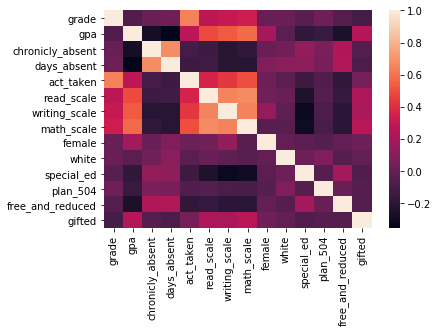

In [3]:
corr = data.corr()
corr

sns.heatmap(corr)


It's pretty clear that the ISASP scores are very correlated with themselves, with the corelation coefficent ranging from 0.65, to 0.68, which is fairly correlated. 

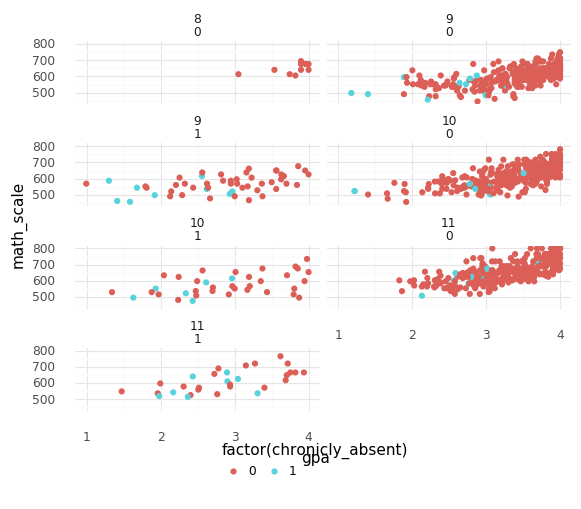

<ggplot: (-9223371877090811968)>

In [4]:

(ggplot(data, aes(y='math_scale', x='gpa', color='factor(chronicly_absent)'))
 + geom_point()
 + facet_wrap("~grade+free_and_reduced", ncol=2)
 + theme_minimal()
 + theme(legend_position = "bottom")
)


## Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = data[['grade', 'gpa', 'act_taken', 'read_scale', 'math_scale','female']]
y = data[['days_absent']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [6]:

reg_fit = LinearRegression()  
reg_fit.fit(X_train, y_train)
reg_fit



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coeff_df = pd.DataFrame([reg_fit.coef_], X.columns, columns=['Coefficient'])  
coeff_df

ValueError: Must pass 2-d input

In [ ]:
y_pred = reg_fit.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Logistic Regression

## Clustering